# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


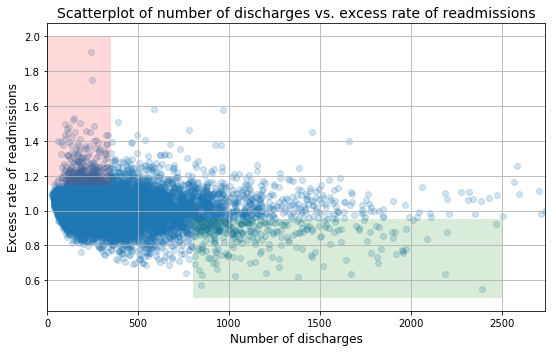

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### Initial read of data

In [5]:
len(clean_hospital_read_df)

11578

In [6]:
clean_hospital_read_df.describe()

Provider Number  Number of Discharges  Footnote  \
count     11578.000000          11578.000000      81.0   
mean     257681.537226            362.909397       7.0   
std      154542.645531            309.176945       0.0   
min       10001.000000              0.000000       7.0   
25%      110129.750000            157.000000       7.0   
50%      250040.000000            280.000000       7.0   
75%      390041.000000            472.750000       7.0   
max      670082.000000           6793.000000       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
count              11497.000000                11497.000000   
mean                   1.007504                   17.984292   
std                    0.091964                    5.487651   
min                    0.549500                    2.700000   
25%                    0.952600                   16.300000   
50%                    1.003500                   19.000000   
75%                    1.058100                   21.500000   
max                    1.909500                   32.800000   

       Expected Readmission Rate  Number of Readmissions  
count               11497.000000            11497.000000  
mean                   17.865695               63.633731  
std                     5.240749               59.540296  
min                     3.900000               11.000000  
25%                    16.600000               24.000000  
50%                    19.000000               45.000000  
75%                    21.400000               82.000000  
max                    28.000000              879.000000

In [7]:
clean_hospital_read_df.shape

(11578, 12)

In [8]:
clean_hospital_read_df.head()

Hospital Name  Provider Number State  \
16857           THREE RIVERS MEDICAL CENTER           180128    KY   
14582  SELLS INDIAN HEALTH SERVICE HOSPITAL            30074    AZ   
15606     PHS INDIAN HOSPITAL AT PINE RIDGE           430081    SD   
15615    FLORIDA STATE HOSPITAL UNIT 31 MED           100298    FL   
14551                GREENE COUNTY HOSPITAL            10051    AL   

                 Measure Name  Number of Discharges  Footnote  \
16857  READM-30-HIP-KNEE-HRRP                     0       7.0   
14582      READM-30-COPD-HRRP                     0       7.0   
15606       READM-30-AMI-HRRP                     0       7.0   
15615      READM-30-COPD-HRRP                     0       7.0   
14551       READM-30-AMI-HRRP                     0       7.0   

       Excess Readmission Ratio  Predicted Readmission Rate  \
16857                       NaN                         NaN   
14582                       NaN                         NaN   
15606                       NaN                         NaN   
15615                       NaN                         NaN   
14551                       NaN                         NaN   

       Expected Readmission Rate  Number of Readmissions  Start Date  \
16857                        NaN                     NaN  07/01/2010   
14582                        NaN                     NaN  07/01/2010   
15606                        NaN                     NaN  07/01/2010   
15615                        NaN                     NaN  07/01/2010   
14551                        NaN                     NaN  07/01/2010   

         End Date  
16857  06/30/2013  
14582  06/30/2013  
15606  06/30/2013  
15615  06/30/2013  
14551  06/30/2013

### Do you agree with the above analysis and recommendations? Why or why not?

The first observation was:
    * Overall, rate of readmissions is trending down with increasing number of discharges.

However, based on the graph show, the data appears to be extremely noisy, with the vast majority of data points centered around a readmission rate of 1.0. Without a trend line, it is hard to quantify the effect of the data points in the red and green boxes. The large bulk centered around 1.0 may not make those discharges statistically meaningful in those boxes. 

The two conclusions are: 
* There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
* Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

For the first bullet point, while the report states that there is significant correlation, there isn't any quantitive test that backs up this claim. A way to improve these recommendations would be to use a significance test and correlation test to check if this claim is valid.


For the second bullet point, the conclusion states that hospitals may be lacking necessary resources, but there is not enough analysis given in the preliminary report that can make the claim that hospital resources are the underlying factor that determine readmissions. This is an important factor, as when the cost of Medicare increase, there will be more need to determine how better care can be given despite stagnant of diminishing resources.

In order for this analysis to be statistically meaningful, we'll need to the following steps as recommended in part B.

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for  α  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
5. Look at the scatterplot above:


* What are the advantages and disadvantages of using this plot to convey information?
* Construct another plot that conveys the same information in a more direct manner.

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#### Setup an appropriate hypothesis test.

Null hypothesis: There is no correlation between hospital capacity (number of discharges) and readmission rates.

__H0__: Mean excess readmission rate for hospitals/facilities are same with different number of discharges.

__H1__: Mean excess readmission rate for hospitals/facilities are different with different number of discharges.

#### Compute and report the observed significance value (or p-value). Report statistical significance for α = .01.


In [10]:
# Excess Readmission Ratio
hospital_df_excess = clean_hospital_read_df['Excess Readmission Ratio']
hospital_df_excess = hospital_df_excess.dropna(how='any')
len(hospital_df_excess)

11497

Compare two methods to get the 99% confidence interval of mean Excess Readmission Ration of the sample

In [11]:
# 99% Confidence interval for a large sample size
stats.norm.interval(0.99, loc=np.mean(hospital_df_excess), scale=stats.sem(hospital_df_excess))


(1.0052945383809102, 1.0097130288105189)

In [12]:
# 99% Confidence interval with standard error of the mean
stats.t.interval(0.99, len(hospital_df_excess)-1, loc=np.mean(hospital_df_excess), scale=stats.sem(hospital_df_excess))

(1.0052941715142687, 1.0097133956771605)

So we are 99% confident the excess readmission rate is between 1.005294 and 1.00971, based on the two different functions for gathering the confidence interval.


In [13]:
# Sample mean
excess_mean = hospital_df_excess.mean()
excess_mean

1.0075037835957146

In [14]:
# Margin of error
error = excess_mean - 1.0052941715142687 #lower interval bound
error

0.0022096120814458775

Analyze sample for Number of Discharges < 100 to see the p-value of the practical sample mean.

In [15]:
# Excess Readmission Ratio for Number of Discharges < 100, or very small hospitals
hospital_df_excess_small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
clean_hospital_df_excess_small = hospital_df_excess_small['Excess Readmission Ratio']
clean_hospital_df_excess_small = clean_hospital_df_excess_small.dropna(how='any')

In [16]:
# Sample mean 
small_mean = clean_hospital_df_excess_small.mean()
small_mean

1.0226183501683506

In [17]:
# Z score
z_score_1 = (small_mean - excess_mean)/error # was h, now error
z_score_1

6.840371076693992

In [18]:
# p-value for sample mean = 1.02262, using a z-score table, which gives a value of 1 for such a large z-score
p_value_1 = 1 - 1 # for an upper-tailed test
p_value_1

0

So we will reject the null hypothesis and there IS correlation between hospital capacity (number of discharges) and readmission rates.

It is significant at the p < 0.05 and 0.01 confidence levels

In [19]:
# Now let's analyze the sample for Number of Discharges > 1000, and find the p-value for the practical sample mean.
# Excess Readmission Ratio for Number of Discharges > 1000, or large hospitals
hospital_df_excess_large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]
clean_hospital_df_excess_large = hospital_df_excess_large['Excess Readmission Ratio']
clean_hospital_df_excess_large = clean_hospital_df_excess_large.dropna(how='any')

In [20]:
# Second Sample mean 
mean_large = clean_hospital_df_excess_large.mean()
mean_large

0.9783354211663071

In [21]:
# Second Z score
z_score_2 = (excess_mean - mean_large)/ error
z_score_2

13.20067113785914

In [22]:
# p-value for sample mean = 1.02262
p_value_2 = 1 - 1
p_value_2

0

Again, this is extremely significant.

We will reject the null hypothesis and there IS correlation 
between hospital capacity (number of discharges) and readmission rates.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
We have 99% conficence that the whole sample mean Excess Readmission Ratio is between 1.0053 and 1.0097. But for Number of Discharges < 100, the probability of get the practical mean value 1.0226 is 0; for Number of Discharges > 1000, the probability of get the practical mean value 0.9783 is 0. 
So there is a huge correlation between hospital capacity (number of discharges) and readmission rates,
based on this data set.

#### Look at the scatterplot above.
#### What are the advantages and disadvantages of using this plot to convey information?
#### Construct another plot that conveys the same information in a more direct manner.

The advantage of using this plot to convey information is that it shows the whole picture, is labeled correctly, and finds the relationship between hosptial size and readmission rates.
The disadvantages of using that scatterplot is that it is unable to clearly convey what exactly are the trends of the relationship between hospital capacity (number of discharges) and readmission rates in a clear manner.

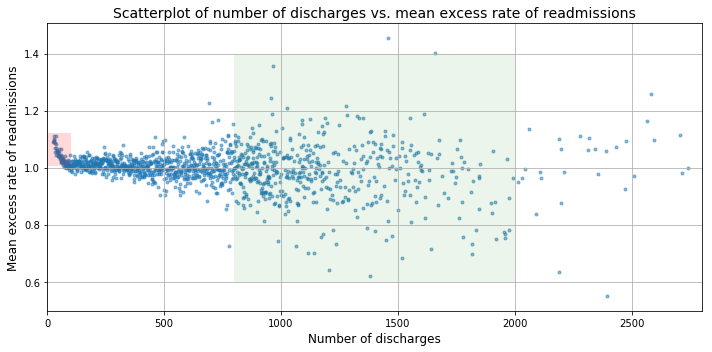

In [23]:
# generate a scatterplot for number of discharges vs. mean excess rate of readmissions
# lists work better with matplotlib scatterplot function
df_plot = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']]
df_plot = df_plot.dropna(how='any')


df_plot = df_plot.groupby(['Number of Discharges'])
x = df_plot['Number of Discharges'].unique()
y = df_plot['Excess Readmission Ratio'].mean()

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y, alpha=0.5, marker='.')

# Use statistical bounds previously determined above
ax.fill_between([0,100], 1.005, 1.12, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2000], .6, 1.4, facecolor='green', alpha = .08, interpolate=True)

# Stretch out the x limit
ax.set_xlim([0, 2800])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Mean excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. mean excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()


## Recommendations for further research

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges (the initial data was correct)
+ This trend is much more clearly seen when the number of discharges is < 100
+ With higher number of discharges, there is a slightly greater occurance of lower rates of readmissions (area shaded green), but also a slightly greater occurance of higher rates of readmissions as well. 
 

**B. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates when number of discharges is < 500. 
+ The is no correlation when the number of discharges is between 800 and 2000
+ When the number of discharges is greater than 2000, there becomes a slightly higher readmission rate again.

**C. Regulatory policy recommendations**
+ Hospitals/clinics with small capacity (< 200) should consolidated so that their resources can be combined until their readmissions rate lowers toward the mean.
+ Hospitals/clinics with high capacity (> 2000) should be looked at on a case-by-case basis to determine if their actions and procedures are in line with 